<a href="https://colab.research.google.com/github/yugant10-commits/EDA-on-Autmobile-Dataset/blob/main/AutomobileDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import plotly.express as px
import seaborn as sns 

In [2]:
#Importing file from the local drive

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Automobile_data.csv to Automobile_data.csv
User uploaded file "Automobile_data.csv" with length 25070 bytes


In [3]:
#Transforming the dataset into dataframe
import io
automobile_df = pd.read_csv(io.BytesIO(uploaded['Automobile_data.csv']))

In [4]:
#Checking the Data

automobile_df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
#Now to check if the dataset has any anomolies in them.
#If any columns is filled with special characters this process drags them out.

import string
special_char_cols = [] 
for i in automobile_df.columns:
    if len(set(automobile_df[i].values).intersection(string.punctuation))>=1:
        print(f'columns = {i} special char -->{set(automobile_df[i].values).intersection(string.punctuation)}')
        special_char_cols.append(i)



columns = normalized-losses special char -->{'?'}
columns = num-of-doors special char -->{'?'}
columns = bore special char -->{'?'}
columns = stroke special char -->{'?'}
columns = horsepower special char -->{'?'}
columns = peak-rpm special char -->{'?'}
columns = price special char -->{'?'}


In [6]:
automobile_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
#Checking if there exists any column without data.(i.e, data not available)

automobile_df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
#Thenot available datas are signified by ? in the dataset. 
#Replacing ? with nan. 

for i in special_char_cols:
  automobile_df[i].replace('?', np.nan, inplace= True )
  

In [9]:
#Now we finally get the accurate measure of missing values in the columns.
automobile_df.isna().sum()


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

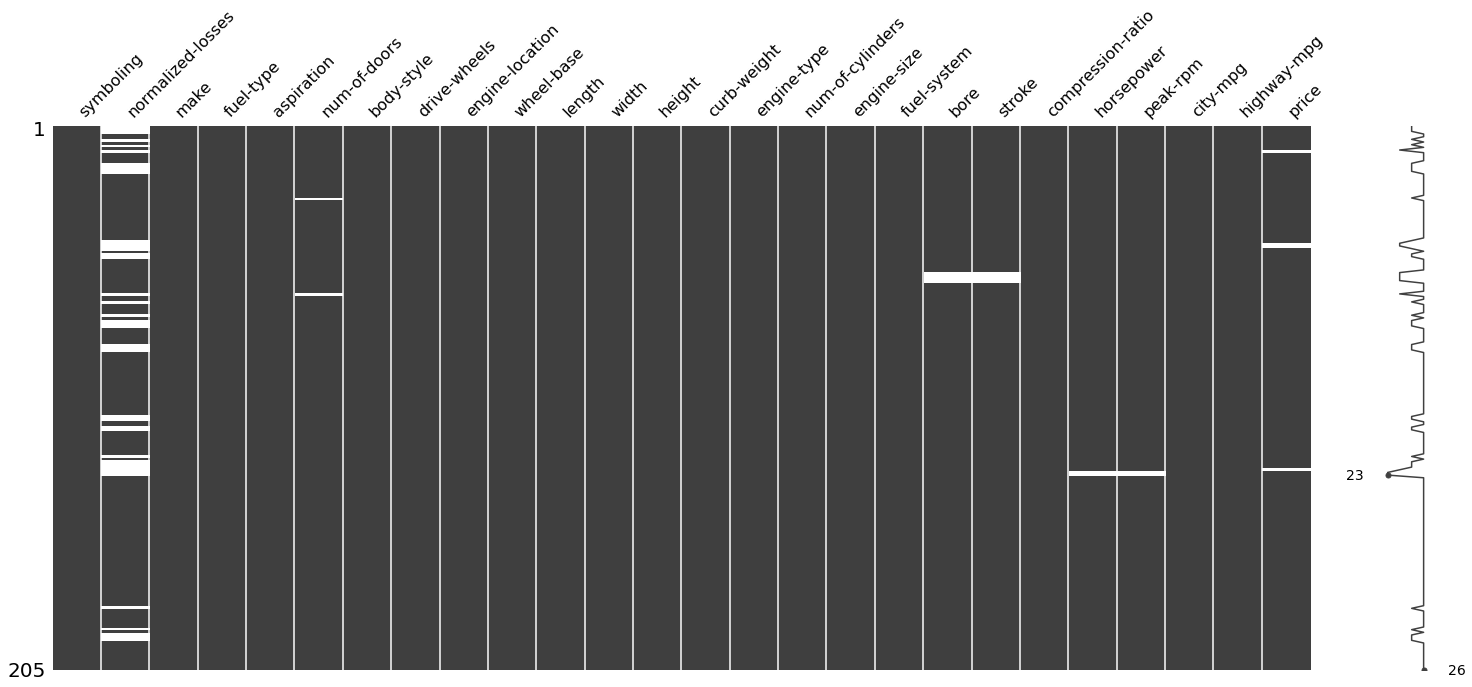

In [10]:
#Visualizing all the columns that contain the misssing variables.
missingno.matrix(automobile_df)

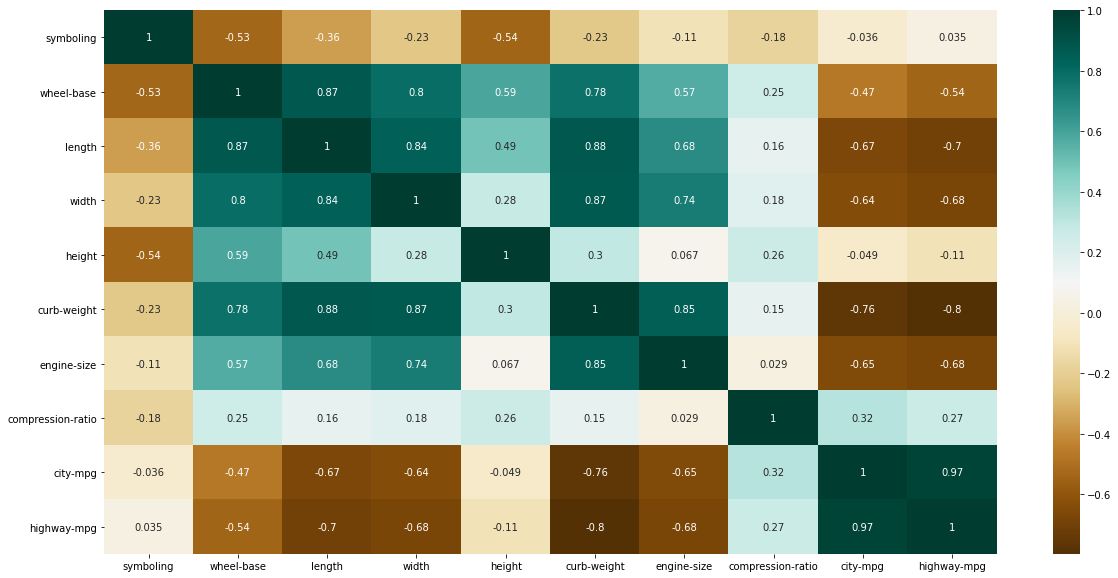

In [11]:
plt.figure(figsize=(20,10))
c = automobile_df.corr()
sns.heatmap(c, cmap='BrBG', annot = True)


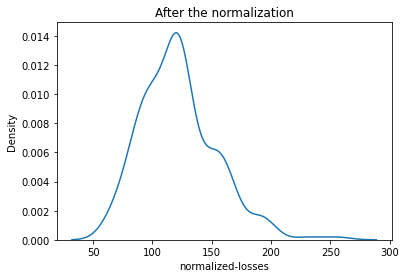

In [56]:
#Substituting the non available data to mean
# Starting with normalized losses since it has the most number of missing values.

automobile_df['normalized-losses'] = automobile_df['normalized-losses'].astype(float)

automobile_df['normalized-losses'] = automobile_df['normalized-losses'].replace(np.nan, int(automobile_df['normalized-losses'].mean()+np.random.randint(1,4)))
sns.kdeplot(automobile_df['normalized-losses'])
plt.title('After the normalization')
plt.show()



In [68]:
#Replacing all the other column's NA values with their mean.

automobile_df.isna().sum()
automobile_df['bore'] = automobile_df['bore'].astype(float)
automobile_df['stroke'] = automobile_df['stroke'].astype(float)
automobile_df['horsepower'] = automobile_df['horsepower'].astype(float)
automobile_df['peak-rpm'] = automobile_df['peak-rpm'].astype(float)


automobile_df['bore'] = automobile_df['bore'].replace(np.nan, int(automobile_df['bore'].mean()))
automobile_df['stroke'] = automobile_df['stroke'].replace(np.nan, int(automobile_df['stroke'].mean()))
automobile_df['horsepower'] = automobile_df['horsepower'].replace(np.nan, int(automobile_df['horsepower'].mean()))
automobile_df['peak-rpm'] = automobile_df['peak-rpm'].replace(np.nan, int(automobile_df['peak-rpm'].mean()))


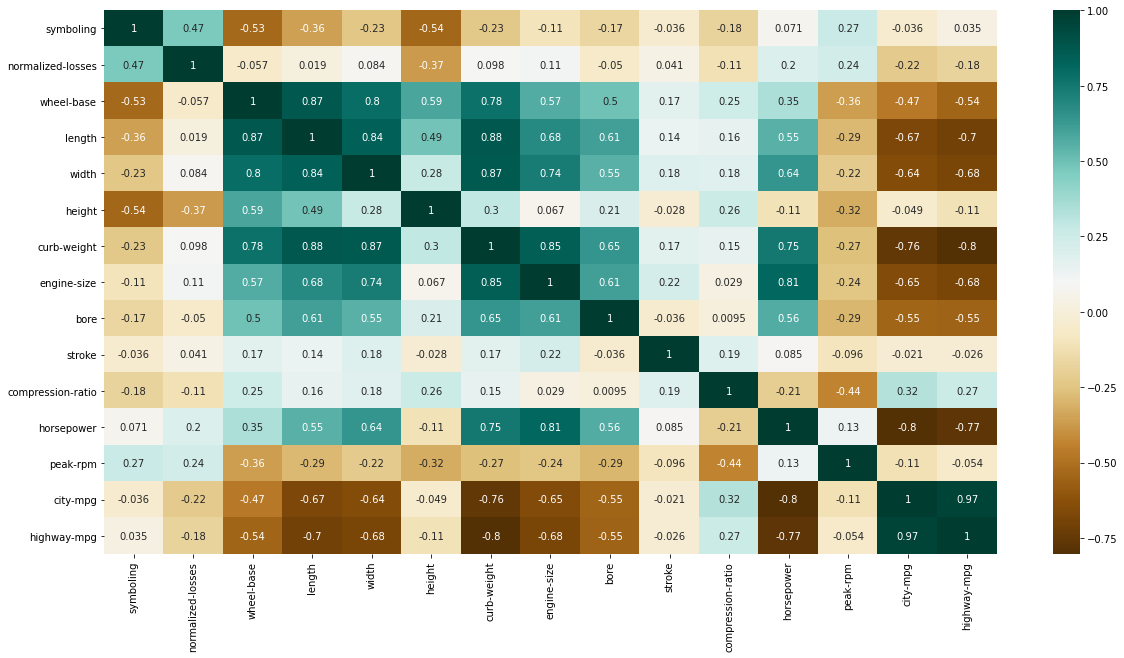

In [71]:
#Again, checking the correlation map
plt.figure(figsize=(20,10))
c = automobile_df.corr()
sns.heatmap(c, cmap='BrBG', annot = True)

<Figure size 432x288 with 0 Axes>

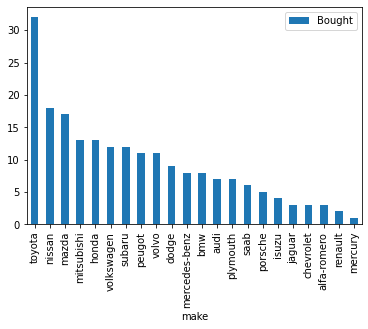

<Figure size 432x288 with 0 Axes>

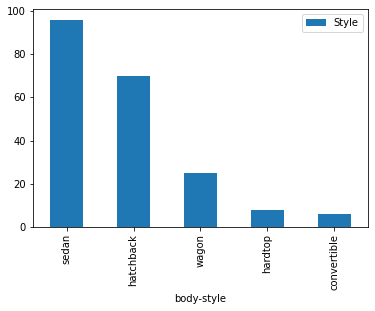

In [75]:
#Checking which model has been bought the most and which body style is preferred.
automobile_df.tail()
model_bought = pd.DataFrame(automobile_df.groupby('make')['make'].count())
model_bought.columns = ['Bought']
model_bought.sort_values(by=['Bought'], inplace=True,ascending=False)
plt.figure()
model_bought.plot.bar()


body_style = pd.DataFrame(automobile_df.groupby('body-style')['body-style'].count())
body_style.columns = ['Style']
body_style.sort_values(by=['Style'], inplace=True,ascending=False)
plt.figure()
body_style.plot.bar()
